In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']#用来正常显示中文标签
import re 

In [8]:
import os
os.chdir('E:\py_data')

In [68]:
bra = (pd.read_csv('bra.csv') ).dropna()  # 读取bra数据,并删除有一个空缺值的行
col = (pd.read_csv('colors.csv') ).dropna()  # 读取colors数据，并删除有一个空缺值的行

In [147]:
bras = np.array(bra).astype('str')  #将其转化为数组，且将元素类型转化为str
cols = np.array(col).astype('str')
bra_color = bras[:,1] 
col_color = cols[:,2] 

In [211]:
bra_color = bras[:,1] 
col_color = cols[:,1] 
color_name = { }  #bra数据中更改为10种简单颜色命名
for i in range(bra_color.shape[0]):
    color_name[i] = cols[col_color == bra_color[i],2][0]
    #print(color_name[i])
#len(color_name)

In [212]:
"""统计颜色"""
ls_color = list(color_name.values())  #转化为列表
color_arr = ['粉色','肤色','黑色','红色','黄色','灰色','蓝色','绿色','紫色','棕色']

color_num_arr = []
for i in color_arr:
    num = ls_color.count(i)
    color_num_arr.append(num)
#print(color_num_arr)

[2000, 2169, 2142, 2715, 268, 126, 3423, 97, 2505, 51]


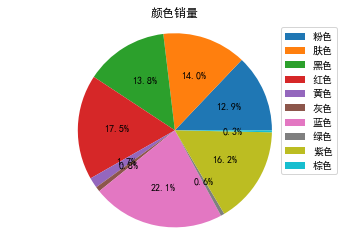

In [237]:
"""颜色饼图"""
plt.pie(color_num_arr,autopct='%0.1f%%')
plt.axis('equal')
plt.legend(color_arr)
plt.title('颜色销量')
plt.show()

In [240]:
"""统计尺码"""
size = bras[:,2]
res =[]
for i in size:
    res.append(re.findall(r'[A-Za-z]', i)[0]) #使用正则提取尺码信息（且只取第一个字母）

In [243]:
cup = pd.value_counts(res) 
# print(cup)
num_cup = []
num_cup_A = cup.loc['A'] + cup.loc['a']
num_cup_B = cup.loc['B']
num_cup_C = cup.loc['C'] + cup.loc['c'] 
num_cup_D = cup.loc['D']
num_cup_E = cup.loc['E']
num_cup.append(num_cup_A)
num_cup.append(num_cup_B)
num_cup.append(num_cup_C)
num_cup.append(num_cup_D)
num_cup.append(num_cup_E)
print(num_cup) 

B    12399
C     1266
A      968
D      423
L      152
M      113
X       75
a       65
E       34
c        1
dtype: int64
[1033, 12399, 1267, 423, 34]


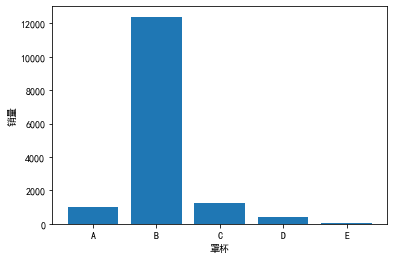

In [239]:
"""尺码条形图"""
cup_size = ['A','B','C','D','E']
plt.bar(cup_size,num_cup)

plt.xlabel('罩杯')
plt.ylabel('销量')
plt.show()